In [285]:
import pickle
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import DotDict

In [80]:
with open('out/cp_ablation/CP_ablation.out', 'rb') as f:
    results = pickle.load(f)
    
config = DotDict.from_json('out/cp_ablation/ablation_schedule_20201203-111902.json')

In [263]:
def eCDFs(data: list, bins = 20, label: list = None):
    
    success_ratio = list()
    plot_data = list()
    for v in data:
        y, x, _ = plt.hist(v.T, cumulative=True, bins=bins)
        plt.close()
    
        x = np.linspace(np.min(y), np.max(y), v.shape[-1])
        
        # Checks whether ERT is infinite at x0.
        fail_mask = v.max(axis=1) != v.max()
        success_ratio.append(1 - fail_mask.astype(int).sum() / len(v))
        
        aggr = v.mean(axis=0)
        
        plot_data.append((x, aggr))
    
    plt.figure(figsize=(8,7))
    plt.grid(linestyle='--', linewidth=1)
    
    for i, (x, y) in enumerate(plot_data):            
        if label is not None:
            plt.plot(x, y, label=label[i])
        else:
            plt.plot(x, y)
    
    if label is not None:
        plt.legend()
        
    plt.title("Median Cumulative Reward over Trials", fontsize=15)

    plt.xlabel("Trials (Number of selfplay iterations)", fontsize=13)
    plt.ylabel("Cumulative Reward", fontsize=13)
    
    return plot_data, success_ratio


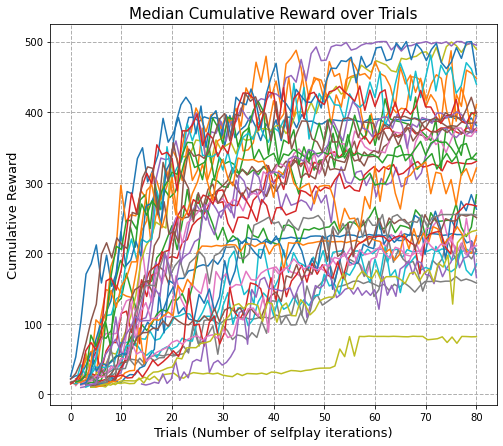

In [264]:
# Example
plot_data, success = eCDFs(list(results.values()))

In [254]:
k1 = list()
k5 = list()
k10 = list()

for k, v in config.items():
    v.args.recursive_update(v.net_args)
  
    if v.args.K == 1:
        k1.append(v.args)
    elif v.args.K == 5:
        k5.append(v.args)
    elif v.args.K == 10:
        k10.append(v.args)

[1.0, 0.75, 0.875, 0.875, 0.875, 0.875]


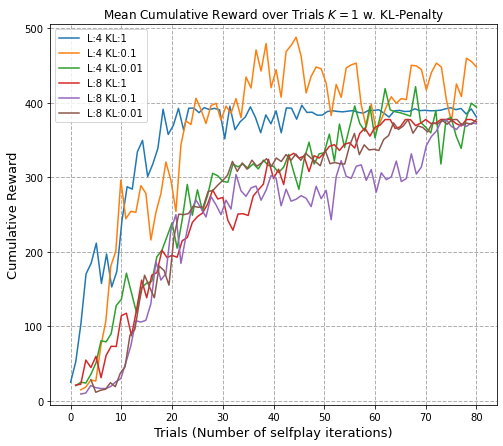

[1.0, 0.75, 0.875, 0.875, 0.875, 0.875]


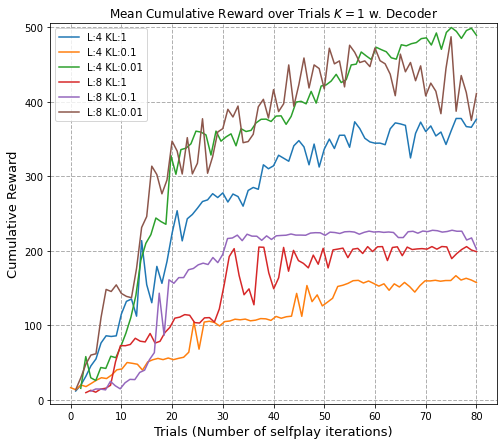

In [268]:
plot_data, k1_kl = eCDFs(list(results.values())[0:6], bins=20, label=[f'L:{x.latent_depth} KL:{x.dynamics_penalty}' for x in k5[:6]])
plt.title(r"Mean Cumulative Reward over Trials $K=1$ w. KL-Penalty")
print(success)
plt.ylim([-5, 505])
plt.show()

plot_data, k1_d = eCDFs(list(results.values())[6:12], bins=20, label=[f'L:{x.latent_depth} KL:{x.dynamics_penalty}' for x in k5[6:]])
plt.title(r"Mean Cumulative Reward over Trials $K=1$ w. Decoder")
print(success)
plt.ylim([-5, 505])
plt.show()

[1.0, 0.75, 0.875, 0.875, 0.875, 0.875]


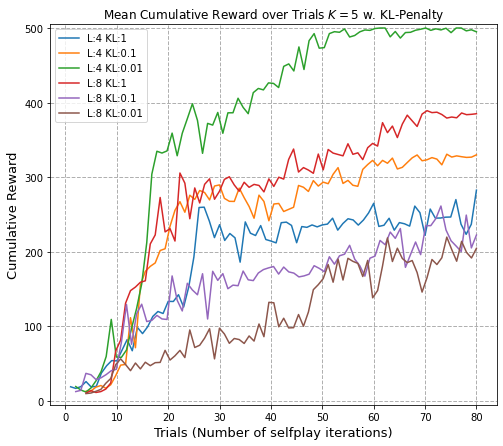

[1.0, 0.75, 0.875, 0.875, 0.875, 0.875]


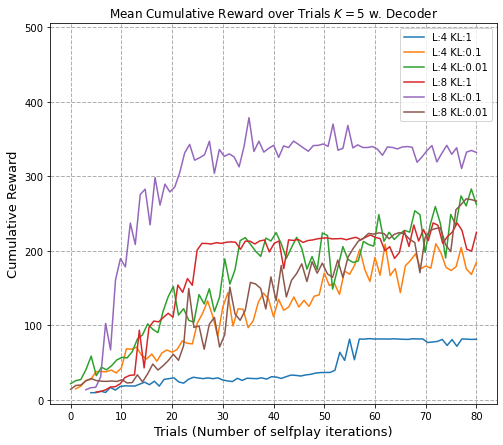

In [269]:
plot_data, k5_kl = eCDFs(list(results.values())[12:18], bins=20, label=[f'L:{x.latent_depth} KL:{x.dynamics_penalty}' for x in k5[:6]])
plt.title(r"Mean Cumulative Reward over Trials $K=5$ w. KL-Penalty")
print(success)
plt.ylim([-5, 505])
plt.show()

plot_data, k5_d = eCDFs(list(results.values())[18:24], bins=20, label=[f'L:{x.latent_depth} KL:{x.dynamics_penalty}' for x in k5[6:]])
plt.title(r"Mean Cumulative Reward over Trials $K=5$ w. Decoder")
print(success)
plt.ylim([-5, 505])
plt.show()

[1.0, 0.75, 0.875, 0.875, 0.875, 0.875]


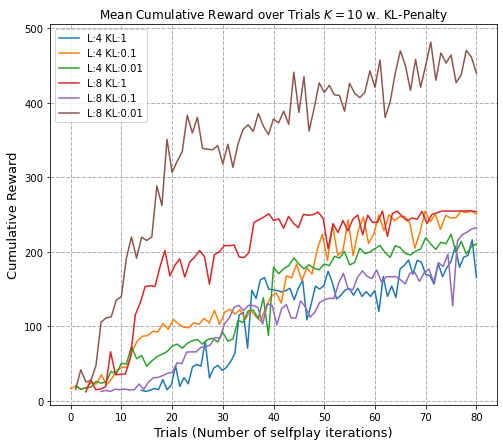

[1.0, 0.75, 0.875, 0.875, 0.875, 0.875]


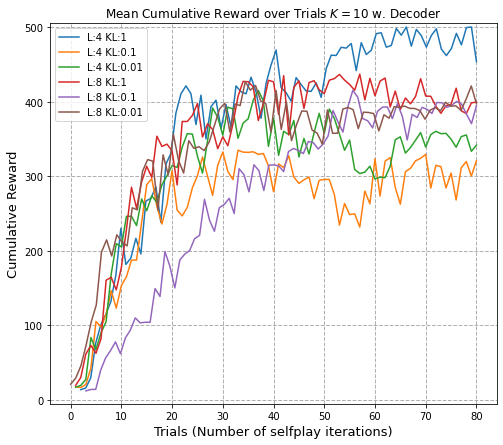

In [270]:
plot_data, k10_kl = eCDFs(list(results.values())[24:30], bins=20, label=[f'L:{x.latent_depth} KL:{x.dynamics_penalty}' for x in k5[:6]])
plt.title(r"Mean Cumulative Reward over Trials $K=10$ w. KL-Penalty")
print(success)
plt.ylim([-5, 505])
plt.show()

plot_data, k10_d = eCDFs(list(results.values())[30:36], bins=20, label=[f'L:{x.latent_depth} KL:{x.dynamics_penalty}' for x in k5[6:]])
plt.title(r"Mean Cumulative Reward over Trials $K=10$ w. Decoder")
print(success)
plt.ylim([-5, 505])
plt.show()

In [288]:
np.array([[k1_kl, k5_kl, k10_kl, k1_d, k5_d, k10_d]])

array([[[0.875, 0.875, 0.75 , 0.75 , 0.75 , 0.75 ],
        [0.375, 0.625, 1.   , 0.75 , 0.5  , 0.375],
        [0.375, 0.5  , 0.25 , 0.5  , 0.375, 0.875],
        [0.75 , 0.25 , 1.   , 0.375, 0.375, 1.   ],
        [0.125, 0.25 , 0.25 , 0.375, 0.625, 0.5  ],
        [1.   , 0.75 , 0.875, 0.875, 0.875, 0.875]]])

In [298]:
df = pd.DataFrame(np.array([k1_kl, k5_kl, k10_kl, k1_d, k5_d, k10_d]))
df.columns = ['L4_1', 'L4_0.1', 'L4_0.01', 'L8_1', 'L8_0.1', 'L8_0.01']
df.index = ['k1_kl', 'k5_kl', 'k10_kl', 'k1_d', 'k5_d', 'k10_d']

In [299]:
df

,L4_1,L4_0.1,L4_0.01,L8_1,L8_0.1,L8_0.01
k1_kl,0.875,0.875,0.750,0.750,0.750,0.750
k5_kl,0.375,0.625,1.000,0.750,0.500,0.375
k10_kl,0.375,0.500,0.250,0.500,0.375,0.875
k1_d,0.750,0.250,1.000,0.375,0.375,1.000
k5_d,0.125,0.250,0.250,0.375,0.625,0.500
k10_d,1.000,0.750,0.875,0.875,0.875,0.875


In [309]:
df.sum(axis=1)

k1_kl     4.750
k5_kl     3.625
k10_kl    2.875
k1_d      3.750
k5_d      2.125
k10_d     5.250
dtype: float64

In [310]:
df.sum(axis=0)

L4_1       3.500
L4_0.1     3.250
L4_0.01    4.125
L8_1       3.625
L8_0.1     3.500
L8_0.01    4.375
dtype: float64